In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

#Dataset

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


In [ ]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train']
['horse', 'dog', 'airplane', 'bird', 'cat', 'truck', 'automobile', 'deer', 'ship', 'frog']


In [ ]:
airplane_files = os.listdir(data_dir + '/train/airplane')
print(f'No. of training examples for airplanes: {len(airplane_files)}')
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['1296.png', '4358.png', '0016.png', '4422.png', '0080.png']


In [ ]:
ship_test_files = os.listdir(data_dir + '/test/ship')
print(f'No. of test examples for ship: {len(ship_test_files)}')
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0016.png', '0080.png', '0291.png', '0426.png', '0709.png']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [ ]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_example(img, label):
  print(f'Label: {dataset.classes[label]}, {label}')
  plt.imshow(img.permute(1,2,0))

Label: airplane, 0


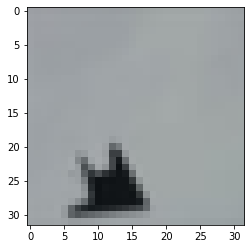

In [ ]:
show_example(*dataset[4999])

Label: automobile, 1


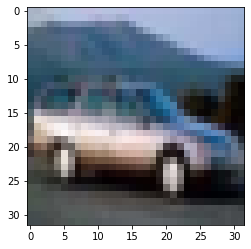

In [ ]:
show_example(*dataset[5000])

#Loaders

In [ ]:
random_seed = 42
torch.manual_seed(random_seed)

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_size, val_size

(45000, 5000)

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 100

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, _ in dl:
    print(images.shape)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=10).permute(1,2,0))
    break

torch.Size([100, 3, 32, 32])


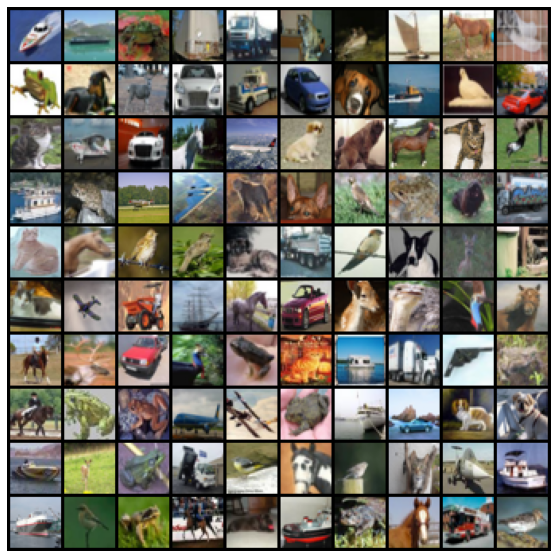

In [ ]:
show_batch(train_dl)

#Kernel application example

In [ ]:
def apply_kernel(image, kernel):
  ri, ci = image.shape      # image dimensions
  rk, ck = kernel.shape     # kernel dimensions
  ro, co = ri-rk+1, ci-ck+1 # output dimensions
  output = torch.zeros([ro, co])
  for i in range(ro):
    for j in range(co):
      output[i,j] = torch.sum(image[i:i+rk, j:j+ck] * kernel)
  return output

In [ ]:
sample_image = torch.tensor([
                             [3, 3, 2, 1, 0],
                             [0, 0, 1, 3, 1],
                             [3, 1, 2, 2, 3],
                             [2, 0, 0, 2, 2],
                             [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
                              [0, 1, 2],
                              [2, 2, 0],
                              [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  out = simple_model(images)
  print(out.shape)
  break

torch.Size([100, 3, 32, 32])
torch.Size([100, 8, 16, 16])


In [ ]:
def accuracy(out, targets):
  _, preds = torch.max(out, dim=1)
  return torch.tensor(torch.sum(preds == targets).item() / len(preds))

In [ ]:
class ModelBase(nn.Module):
  def training_step(self, batch):
    xb, targets = batch
    out = self(xb)
    loss = F.cross_entropy(out, targets)
    return loss

  def validation_step(self, batch):
    xb, targets = batch
    out = self(xb)
    val_loss = F.cross_entropy(out, targets)
    val_acc = accuracy(out, targets)
    return {'val_loss': val_loss, 'val_acc': val_acc}

  def validation_epoch_end(self, res):
    losses = [x['val_loss'] for x in res]
    epoch_loss = torch.stack(losses).mean()
    accs = [x['val_acc'] for x in res]
    epoch_acc = torch.stack(accs).mean()
    return {'epoch_loss': epoch_loss.item(), 'epoch_acc': epoch_acc.item()}

  def epoch_end(self, epoch, res):
    print(f'Epoch [{epoch}], Train loss: [{round(res["train_loss"], 4)}], Validation loss: [{round(res["epoch_loss"], 4)}], Validation accuurcay [{round(res["epoch_acc"], 4)}]')

In [ ]:
class Cifar10CnnModel1(ModelBase):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

        nn.Flatten(),
        nn.Linear(256*4*4, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
#        nn.Dropout(0.2),
        nn.Linear(512, 10)
    )
  def forward(self, xb):
    return self.network(xb)

In [ ]:
model1 = Cifar10CnnModel1()
model1

Cifar10CnnModel1(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fea

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  out = model1(images)
  print(out.shape)
  print(out[0])
  break

In [ ]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model1, device)

Cifar10CnnModel1(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fea

In [ ]:
@torch.no_grad()
def evaluate(model, dl):
  model.eval()
  res = [model.validation_step(b) for b in dl]
  return model.validation_epoch_end(res)

def fit(n_epochs, model, train_dl, val_dl, lr, opt_f=torch.optim.SGD):
  history = []
  optimizer = opt_f(model.parameters(), lr)
  for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for batch in train_dl:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_dl)
    result['train_loss'] = torch.stack(train_losses).mean().item()
    history.append(result)
    model.epoch_end(epoch, result)
  return history

In [ ]:
model1 = to_device(Cifar10CnnModel1(), device)

In [ ]:
history1 = [evaluate(model1, val_dl)]
history1

[{'epoch_acc': 0.10419999808073044, 'epoch_loss': 2.3028509616851807}]

In [ ]:
n_epochs = 10
opt_f = torch.optim.Adam
lr = 0.001

In [ ]:
history1 += fit(n_epochs, model1, train_dl, val_dl, lr, opt_f)

Epoch [0], Train loss: [1.2633], Validation loss: [1.1843], Validation accuurcay [0.58]
Epoch [1], Train loss: [1.019], Validation loss: [0.9124], Validation accuurcay [0.6708]
Epoch [2], Train loss: [0.8348], Validation loss: [0.8516], Validation accuurcay [0.7012]
Epoch [3], Train loss: [0.6857], Validation loss: [0.7204], Validation accuurcay [0.7556]
Epoch [4], Train loss: [0.5775], Validation loss: [0.7427], Validation accuurcay [0.7516]
Epoch [5], Train loss: [0.485], Validation loss: [0.6964], Validation accuurcay [0.7706]
Epoch [6], Train loss: [0.4009], Validation loss: [0.7019], Validation accuurcay [0.7834]
Epoch [7], Train loss: [0.3216], Validation loss: [0.7706], Validation accuurcay [0.7688]
Epoch [8], Train loss: [0.2649], Validation loss: [0.7854], Validation accuurcay [0.777]
Epoch [9], Train loss: [0.2096], Validation loss: [0.8486], Validation accuurcay [0.7754]


In [ ]:
def plot_accuracies(history):
  accs = [x['epoch_acc'] for x in history]
  plt.figure(figsize=(20,8))
  plt.plot(accs, '-x')
  plt.xlabel('Accuracy score')
  plt.ylabel('Epoch')
  plt.title('Accuracy X Epochs');

In [ ]:
def plot_losses(history):
  history = history[1:]
  losses = [x['epoch_loss'] for x in history]
  train_losses = [x['train_loss'] for x in history]
  plt.figure(figsize=(20,8))
  plt.plot(train_losses, label='Train loss')
  plt.plot(losses, '-x', label='Validation loss')
  plt.xlabel('Cross entropy score')
  plt.ylabel('Epoch')
  plt.title('Losses X Epochs')
  plt.legend();

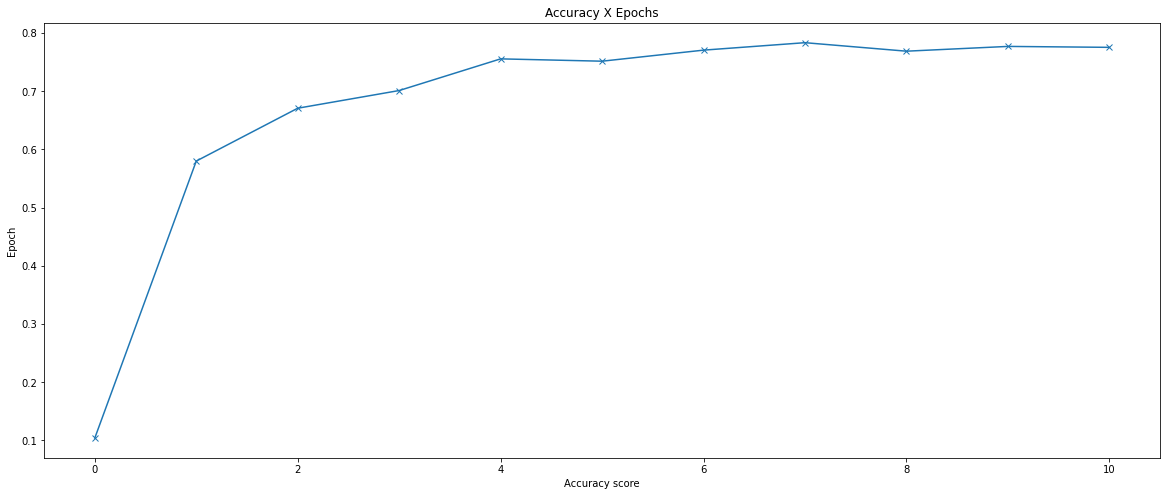

In [ ]:
plot_accuracies(history1)

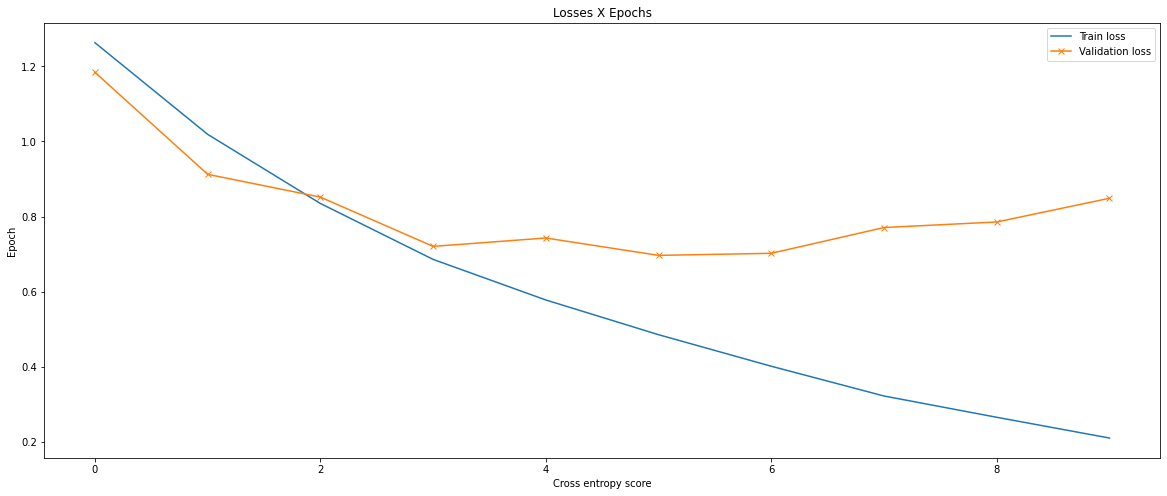

In [ ]:
plot_losses(history1)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [ ]:
def predict_image(img, model):
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return dataset.classes[preds[0].item()]

Lable: airplane, Predicted: horse


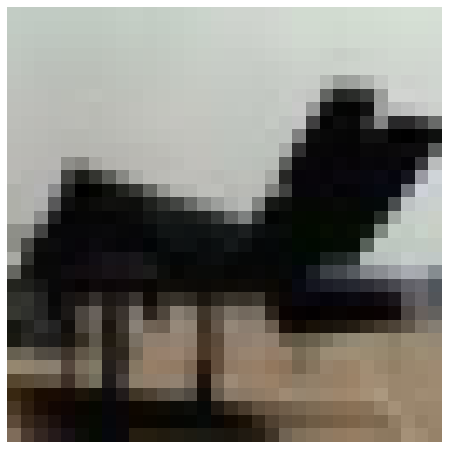

In [ ]:
img, label = test_dataset[54]
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img.permute(1,2,0))
print(f'Lable: {dataset.classes[label]}, Predicted: {predict_image(img, model1)}')

In [ ]:
test_loader = DeviceDataLoader(dl=DataLoader(test_dataset, batch_size*2), device=device)
result__ = evaluate(model1, test_loader)
result__

{'epoch_acc': 0.773699939250946, 'epoch_loss': 0.8627914190292358}